In [1]:
import ROOT
import my_library.common_analysis_tools as tools
import my_library.constants as constants
import my_library.kinematic_cuts as kcuts

Welcome to JupyROOT 6.24/04


In [2]:
df_pipkmks = tools.get_dataframe('pipkmks', 'spring', 'data')
df_pimkpks = tools.get_dataframe('pimkpks', 'spring', 'data')

In [8]:
df_pipkmks = df_pipkmks.Filter(kcuts.KSTAR_ALL_CUT_PIPKMKS)
df_pimkpks = df_pimkpks.Filter(kcuts.KSTAR_ALL_CUT_PIMKPKS)

In [9]:
hist_old_pipkmks = df_pipkmks.Histo1D(('old_pipkmks', 'M(#pi^{+}K^{-}K_{S}) with current cuts', 50, 1.1, 1.6), 'pipkmks_m')
hist_old_pimkpks = df_pimkpks.Histo1D(('old_pimkpks', 'M(#pi^{-}K^{+}K_{S}) with current cuts', 50, 1.1, 1.6), 'pimkpks_m')
hist_new_pipkmks = df_pipkmks.Filter('kmp_m > 2.0').Filter('ksp_m > 2.0').Histo1D(('new_pipkmks', 'M(#pi^{+}K^{-}K_{S}) with new M(pK) cuts', 50, 1.1, 1.6), 'pipkmks_m')
hist_new_pimkpks = df_pimkpks.Filter('kpp_m > 2.0').Filter('ksp_m > 2.0').Histo1D(('new_pimkpks', 'M(#pi^{-}K^{+}K_{S}) with new M(pK) cuts', 50, 1.1, 1.6), 'pimkpks_m')

In [10]:
hist_old_pipkmks.SetLineColor(ROOT.TColor.GetColor(constants.COLORBLIND_HEX_DICT['blue']))
hist_old_pimkpks.SetLineColor(ROOT.TColor.GetColor(constants.COLORBLIND_HEX_DICT['red']))
hist_new_pipkmks.SetLineColor(ROOT.TColor.GetColor(constants.COLORBLIND_HEX_DICT['blue']))
hist_new_pimkpks.SetLineColor(ROOT.TColor.GetColor(constants.COLORBLIND_HEX_DICT['red']))

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


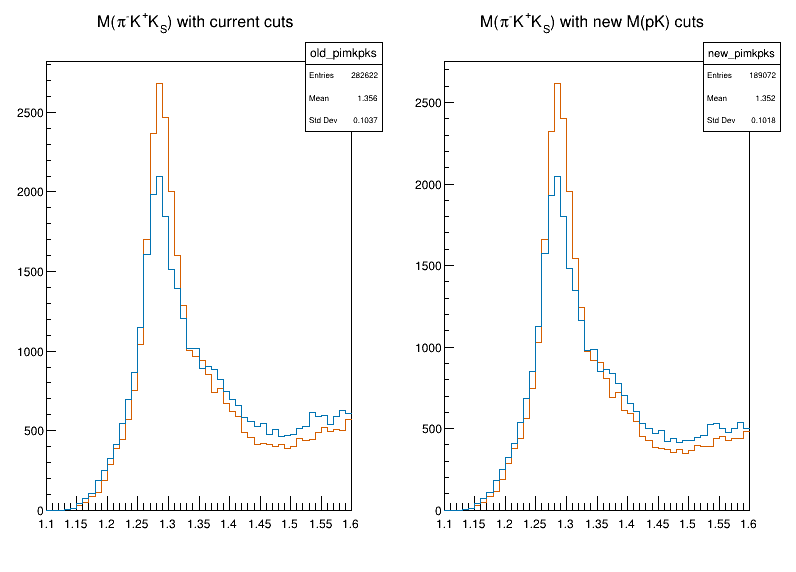

In [11]:
c = ROOT.TCanvas('c', 'c', 800, 600)
c.Divide(2, 1)
c.cd(1)
hist_old_pimkpks.Draw()
hist_old_pipkmks.Draw("same")
c.cd(2)
hist_new_pimkpks.Draw()
hist_new_pipkmks.Draw("same")
c.Draw()